#Milestone 1

#Perkenalan

Nama saya Theo Jonathan dari FTDS Batch 018. Milestone 1 ini dibuat untuk memenuhi tugas akhir di Phase 0 sebagai penilaian hasil pembelajaran dari week 1 sampai dengan week 4. Topik yang saya pilih dan yang akan saya anilisis adalah Bikeshare di kota San Francisco. Analisis saya adalah untuk memberi laporan kinerja Bikeshare di San Francisco kepada para petinggi aplikasi Bikeshare, yang akan digunakan untuk menentukan langkah selanjutnya dalam bisnis mereka.

#Identifikasi Masalah

Saya adalah seorang Data Analis yang bekerja untuk Bikeshare. Para petinggi Bikeshare meminta saya untuk membuat dan menganalisis laporan kinerja aplikasi Bikeshare khususnya di kota San Francisco dari awal berjalannya sistem di tahun 2013 sampai tahun 2018. 

##Topik Permasalahan

Mencari tahu apa yang bisa dilakukan oleh sistem Bikeshare untuk meningkatkan kinerja performa aplikasi mereka dan langkah-langkah apa yang harus diambil untuk mencapai tujuan tersebut.

##Problem Statement

Mengetahui kinerja sistem Bikeshare dan perilaku konsumen terhadap sistem Bikeshare di San Francisco dari tahun 2013 sampai tahun 2018.

##Latar Belakang Permasalahan

Melihat banyaknya pengguna sistem Bikeshare di San Francisco, para petinggi ingin lebih meningkatkan lagi layanan mereka agar sistem Bikeshare bisa terus berjalan dan semakin banyak pengguna.

##Poin Penjabaran

1. Mencari tahu rentang waktu pengambilan data

2. Berapa lama rata-rata waktu pengguna menggunakan Bikeshare?

3. Dari total pengguna Bikeshare, ada berapa banyak pengguna yang merupakan subscriber (memiliki subscription untuk Bikeshare)?

4. Station di kota San Francisco yang paling banyak menjadi pilihan pengguna Bikeshare untuk memulai perjalanan mereka?

5. Station di kota San Francisco yang paling banyak menjadi pilihan pengguna Bikeshare untuk mengakhiri perjalanan mereka?

6. Berapa lama potensi durasi waktu yang ditempuh pengguna Bikeshare yang diprediksikan bisa dicapai di akhir tahun 2018?

#Data Loading

In [1]:
#Import library yang akan digunakan
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
np.random.seed(10)

from google.cloud import bigquery
from google.oauth2 import service_account
import pandas as pd
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

project_id = "my-project-sql-376307" 
client = bigquery.Client(project=project_id)
     

Authenticated


In [2]:
df = client.query('''
SELECT *
FROM `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
''').to_dataframe()
df
#Sumber referensi dari BigQuery Google Cloud

,trip_id,duration_sec,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_number,zip_code,...,c_subscription_type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_gender,bike_share_for_all_trip,start_station_geom,end_station_geom
0,962137,316,2015-10-08 08:17:00+00:00,Mezes,83,2015-10-08 08:22:00+00:00,Redwood City Caltrain Station,22,102,94063,...,Subscriber,NaN,NaN,NaN,NaN,<NA>,None,None,None,None
1,982499,327,2015-10-23 08:12:00+00:00,Mezes,83,2015-10-23 08:17:00+00:00,Redwood City Caltrain Station,22,155,94063,...,Subscriber,NaN,NaN,NaN,NaN,<NA>,None,None,None,None
2,975535,279,2015-10-19 08:15:00+00:00,Mezes,83,2015-10-19 08:20:00+00:00,Redwood City Caltrain Station,22,650,94063,...,Subscriber,NaN,NaN,NaN,NaN,<NA>,None,None,None,None
3,740713,46072,2015-04-25 11:15:00+00:00,Japantown,9,2015-04-26 00:03:00+00:00,Japantown,9,256,95112,...,Customer,NaN,NaN,NaN,NaN,<NA>,None,None,None,None
4,10885,5503,2013-09-04 16:07:00+00:00,Japantown,9,2013-09-04 17:38:00+00:00,Japantown,9,44,95112,...,Customer,NaN,NaN,NaN,NaN,<NA>,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947412,20180326172100.602000671,3021,2018-03-26 17:21:00.602000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2018-03-26 18:11:21.775000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,671,None,...,None,37.781074,-122.411738,37.781074,-122.411738,1959,Male,Yes,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)
1947413,20180221171009.0030003619,2988,2018-02-21 17:10:09.003000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2018-02-21 17:59:57.795000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,3619,None,...,None,37.781074,-122.411738,37.781074,-122.411738,1959,Male,Yes,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)
1947414,20171209001043.1720002652,1995,2017-12-09 00:10:43.172000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2017-12-09 00:43:58.593000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2652,None,...,None,37.781074,-122.411738,37.781074,-122.411738,1960,Male,None,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)
1947415,20180214134114.6830003624,2645,2018-02-14 13:41:14.683000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2018-02-14 14:25:20.212000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,3624,None,...,None,37.781074,-122.411738,37.781074,-122.411738,1959,Male,Yes,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)


##Eksplorasi Data

In [3]:
#Mencari tahu jumlah data yang ada
len(df)

1947417

Terdapat 1.947.417 data di dalam data set

In [4]:
pd.set_option("display.max.columns", None)

In [5]:
pd.set_option("display.precision", 2)

In [6]:
df.columns.values 

array(['trip_id', 'duration_sec', 'start_date', 'start_station_name',
       'start_station_id', 'end_date', 'end_station_name',
       'end_station_id', 'bike_number', 'zip_code', 'subscriber_type',
       'c_subscription_type', 'start_station_latitude',
       'start_station_longitude', 'end_station_latitude',
       'end_station_longitude', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip', 'start_station_geom',
       'end_station_geom'], dtype=object)

In [7]:
df.index.values

array([      0,       1,       2, ..., 1947414, 1947415, 1947416])

In [8]:
print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [9]:
df.columns.tolist()
df.index.tolist()

print (type(df.columns.tolist()))
print (type(df.index.tolist()))

<class 'list'>
<class 'list'>


In [10]:
df.columns = list(map(str, df.columns))

#Data Cleaning

In [11]:
#Memberi nama baru dari kolom-kolom yang akan digunakan
renamed_df = df.rename(
    columns={"trip_id":"Trip_ID","duration_sec": "Duration", "start_date": "Starting_Date", "start_station_name": "Starting_Station", "start_station_id": "Starting_Station_ID", "end_date": "Ending_Date",
             "end_station_name": "Ending_Station", "end_station_id": "Ending_Station_ID","c_subscription_type":"Subscription_Type"}
)
df = renamed_df.copy()
df

,Trip_ID,Duration,Starting_Date,Starting_Station,Starting_Station_ID,Ending_Date,Ending_Station,Ending_Station_ID,bike_number,zip_code,subscriber_type,Subscription_Type,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_gender,bike_share_for_all_trip,start_station_geom,end_station_geom
0,962137,316,2015-10-08 08:17:00+00:00,Mezes,83,2015-10-08 08:22:00+00:00,Redwood City Caltrain Station,22,102,94063,nan,Subscriber,NaN,NaN,NaN,NaN,<NA>,None,None,None,None
1,982499,327,2015-10-23 08:12:00+00:00,Mezes,83,2015-10-23 08:17:00+00:00,Redwood City Caltrain Station,22,155,94063,nan,Subscriber,NaN,NaN,NaN,NaN,<NA>,None,None,None,None
2,975535,279,2015-10-19 08:15:00+00:00,Mezes,83,2015-10-19 08:20:00+00:00,Redwood City Caltrain Station,22,650,94063,nan,Subscriber,NaN,NaN,NaN,NaN,<NA>,None,None,None,None
3,740713,46072,2015-04-25 11:15:00+00:00,Japantown,9,2015-04-26 00:03:00+00:00,Japantown,9,256,95112,nan,Customer,NaN,NaN,NaN,NaN,<NA>,None,None,None,None
4,10885,5503,2013-09-04 16:07:00+00:00,Japantown,9,2013-09-04 17:38:00+00:00,Japantown,9,44,95112,nan,Customer,NaN,NaN,NaN,NaN,<NA>,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1947412,20180326172100.602000671,3021,2018-03-26 17:21:00.602000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2018-03-26 18:11:21.775000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,671,None,Subscriber,None,37.78,-122.41,37.78,-122.41,1959,Male,Yes,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)
1947413,20180221171009.0030003619,2988,2018-02-21 17:10:09.003000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2018-02-21 17:59:57.795000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,3619,None,Subscriber,None,37.78,-122.41,37.78,-122.41,1959,Male,Yes,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)
1947414,20171209001043.1720002652,1995,2017-12-09 00:10:43.172000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2017-12-09 00:43:58.593000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2652,None,Subscriber,None,37.78,-122.41,37.78,-122.41,1960,Male,None,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)
1947415,20180214134114.6830003624,2645,2018-02-14 13:41:14.683000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2018-02-14 14:25:20.212000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,3624,None,Subscriber,None,37.78,-122.41,37.78,-122.41,1959,Male,Yes,POINT(-122.4117382 37.7810737),POINT(-122.4117382 37.7810737)


In [12]:
#Menghapus kolom yang tidak diperlukan
unused_columns = ["bike_number","zip_code", "subscriber_type", "start_station_latitude", "start_station_longitude","end_station_latitude","end_station_longitude","member_birth_year","member_gender",
                  "bike_share_for_all_trip","start_station_geom","end_station_geom"]
df.drop(unused_columns, inplace=True, axis=1)
df

,Trip_ID,Duration,Starting_Date,Starting_Station,Starting_Station_ID,Ending_Date,Ending_Station,Ending_Station_ID,Subscription_Type
0,962137,316,2015-10-08 08:17:00+00:00,Mezes,83,2015-10-08 08:22:00+00:00,Redwood City Caltrain Station,22,Subscriber
1,982499,327,2015-10-23 08:12:00+00:00,Mezes,83,2015-10-23 08:17:00+00:00,Redwood City Caltrain Station,22,Subscriber
2,975535,279,2015-10-19 08:15:00+00:00,Mezes,83,2015-10-19 08:20:00+00:00,Redwood City Caltrain Station,22,Subscriber
3,740713,46072,2015-04-25 11:15:00+00:00,Japantown,9,2015-04-26 00:03:00+00:00,Japantown,9,Customer
4,10885,5503,2013-09-04 16:07:00+00:00,Japantown,9,2013-09-04 17:38:00+00:00,Japantown,9,Customer
...,...,...,...,...,...,...,...,...,...
1947412,20180326172100.602000671,3021,2018-03-26 17:21:00.602000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2018-03-26 18:11:21.775000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,None
1947413,20180221171009.0030003619,2988,2018-02-21 17:10:09.003000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2018-02-21 17:59:57.795000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,None
1947414,20171209001043.1720002652,1995,2017-12-09 00:10:43.172000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2017-12-09 00:43:58.593000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,None
1947415,20180214134114.6830003624,2645,2018-02-14 13:41:14.683000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,2018-02-14 14:25:20.212000+00:00,Civic Center/UN Plaza BART Station (Market St ...,44,None


In [13]:
#Mencari missing value pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1947417 entries, 0 to 1947416
Data columns (total 9 columns):
 #   Column               Dtype              
---  ------               -----              
 0   Trip_ID              object             
 1   Duration             Int64              
 2   Starting_Date        datetime64[ns, UTC]
 3   Starting_Station     object             
 4   Starting_Station_ID  Int64              
 5   Ending_Date          datetime64[ns, UTC]
 6   Ending_Station       object             
 7   Ending_Station_ID    Int64              
 8   Subscription_Type    object             
dtypes: Int64(3), datetime64[ns, UTC](2), object(4)
memory usage: 139.3+ MB


In [14]:
df.isnull().sum()

Trip_ID                     0
Duration                    0
Starting_Date               0
Starting_Station            0
Starting_Station_ID         0
Ending_Date                 0
Ending_Station              0
Ending_Station_ID           0
Subscription_Type      963771
dtype: int64

In [15]:
#Mengatasi missing value
rows_without_missing_data = df.dropna()

In [16]:
rows_without_missing_data.shape

(983646, 9)

#Menjawab Poin Penjabaran

In [17]:
#1. Melihat rentang waktu pengambilan data
dftime = df.groupby(df["Starting_Date"]).sum().sort_values('Starting_Date')
dftime

,Duration,Starting_Station_ID,Ending_Station_ID
Starting_Date,,,
2013-08-29 09:08:00+00:00,174,64,64
2013-08-29 09:24:00+00:00,3315,198,207
2013-08-29 09:25:00+00:00,1118,66,69
2013-08-29 09:31:00+00:00,3829,22,22
2013-08-29 09:35:00+00:00,995,66,66
...,...,...,...
2018-04-30 23:51:07.929000+00:00,477,240,240
2018-04-30 23:56:46.022000+00:00,275,114,64
2018-04-30 23:56:57.045000+00:00,323,36,62


**Analysis**

Dari tabel diatas bisa dilihat bahwa Bikeshare pertama kali digunakan di tanggal 29-08-2013 dan terakhir digunakan pada tanggal 30-04-2018

In [18]:
#2. Berapa lama rata-rata waktu pengguna menggunakan Bikeshare?
df["Duration"].mean()

1007.97207583173

**Analysis**

Dari tabel diatas bisa dilihat bahwa rata-rata pengguna Bikeshare menghabiskan waktu sekitar 1008 detik atau 16.8 menit untuk bersepeda di kota San Francisco.

In [19]:
#3. Mencari ada berapa banyak pengguna yang merupakan subscriber
Subscription = df["Subscription_Type"].value_counts()
Subscription

Subscriber    846837
Customer      136809
Name: Subscription_Type, dtype: int64

Text(0.5, 1.0, 'Subscription Types from 2013-2018')

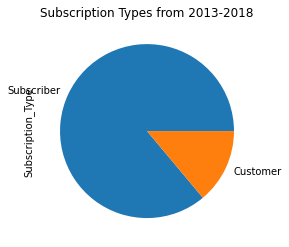

In [20]:
#Visualisasi data menggunakan pie chart
pc= Subscription.plot(kind='pie')

pc.set_title("Subscription Types from 2013-2018")

**Analysis**

Dari data diatas bisa dilihat bahwa dari semua pengguna aplikasi Bikeshare, terdapat 846.837 pengguna yang merupakan Subscriber dan ada 136.809 pengguna yang merupakan Customer atau hanya pengguna sesaat.

In [32]:
#4. Station di kota San Francisco yang paling banyak menjadi pilihan pengguna Bikeshare untuk memulai perjalanan mereka?
df["Starting_Station"].value_counts()

San Francisco Caltrain (Townsend at 4th)    72683
San Francisco Caltrain 2 (330 Townsend)     56100
Harry Bridges Plaza (Ferry Building)        49062
Embarcadero at Sansome                      41137
2nd at Townsend                             39936
                                            ...  
Tamien Station                                 26
San Jose Government Center                     23
5th S at E. San Salvador St                    19
Sequoia Hospital                               15
5th St at E. San Salvador St                    1
Name: Starting_Station, Length: 379, dtype: int64

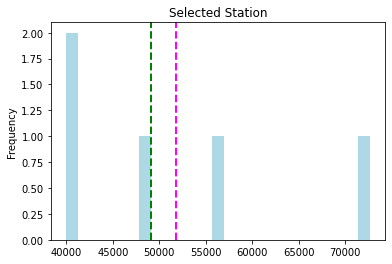

In [34]:
df = pd.DataFrame({'Starting_Station': ['San Francisco Caltrain (Townsend at 4th)', 'San Francisco Caltrain 2 (330 Townsend)', 'Harry Bridges Plaza (Ferry Building)', 'Embarcadero at Sansome ', '2nd at Townsend'],
                   'Selected':[72683,56100,49062,41137,39936]})

selected = df['Selected']
selected.plot.hist(title='Selected Station', color='lightblue', bins=25)  
plt.axvline(selected.mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(selected.median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

Magenta line : mean dari station yang dipilih.

Green line : median dari station yang dipilih.

In [22]:
#Statistical Descriptive
#Menggunakan Central Tendencies
df.groupby('Starting_Station')['Duration'].mean()

Starting_Station
10th Ave at E 15th St                                    1335.92
10th St at Fallon St                                     1042.37
11th St at Bryant St                                      809.67
11th St at Natoma St                                      841.47
12th St at 4th Ave                                        846.75
                                                          ...   
William St at 10th St                                     926.14
Willow St at Vine St                                     1752.79
Woolsey St at Sacramento St                               907.74
Yerba Buena Center for the Arts (Howard St at 3rd St)    1025.33
Yerba Buena Center of the Arts (3rd @ Howard)             943.54
Name: Duration, Length: 379, dtype: Float64

In [23]:
df.groupby('Starting_Station')['Duration'].median()

Starting_Station
10th Ave at E 15th St                                     775.5
10th St at Fallon St                                      468.0
11th St at Bryant St                                      542.0
11th St at Natoma St                                      548.0
12th St at 4th Ave                                        287.0
                                                          ...  
William St at 10th St                                     496.0
Willow St at Vine St                                     1245.5
Woolsey St at Sacramento St                               423.5
Yerba Buena Center for the Arts (Howard St at 3rd St)     592.0
Yerba Buena Center of the Arts (3rd @ Howard)             445.0
Name: Duration, Length: 379, dtype: Float64

In [24]:
df.groupby('Starting_Station')['Duration'].agg(pd.Series.mode)

Starting_Station
10th Ave at E 15th St                                                                                  900
10th St at Fallon St                                                                                   227
11th St at Bryant St                                                                                   379
11th St at Natoma St                                                                                   552
12th St at 4th Ave                                                                                     212
                                                                               ...                        
William St at 10th St                                                                           [279, 358]
Willow St at Vine St                                     [373, 383, 391, 427, 466, 467, 477, 489, 492, ...
Woolsey St at Sacramento St                                                                            290
Yerba Buena Center f

**Analysis**

Dari data diatas dan bila dilihat dari data Central Tendencies, San Francisco Caltrain merupakan daerah yang mempunyai jumlah pengguna aplikasi Bikeshare paling banyak di kota San Francisco.

In [25]:
#5. Station mana yang paling banyak menjadi tempat perhentian pengguna setelah menggunakan Bikeshare?
df["Ending_Station"].value_counts()

San Francisco Caltrain (Townsend at 4th)    92014
San Francisco Caltrain 2 (330 Townsend)     58713
Harry Bridges Plaza (Ferry Building)        50185
Embarcadero at Sansome                      46197
2nd at Townsend                             44145
                                            ...  
Oak St at 1st St                               27
5th S at E. San Salvador St                    24
San Jose Government Center                     23
Sequoia Hospital                               14
5th St at E. San Salvador St                    1
Name: Ending_Station, Length: 379, dtype: int64

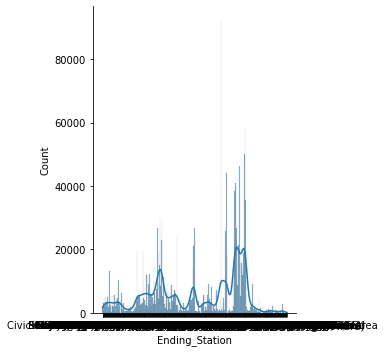

In [26]:
#Line chart
sns.displot(df.Ending_Station, kde=True, label='Ending Station')

**Analysis**

Dari data diatas bisa dilihat bahwa San Francisco Caltrain merupakan daerah yang paling banyak digunakan pengguna aplikasi Bikeshare sebagai tempat perhentian. Bisa juga dikatakan bahwa banyak pengguna memulai perjalanan mereka dari San Francisco Caltrain dan juga mengakhiri perjalanan mereka di San Francisco Caltrain kembali.

In [27]:
#6. Apakah durasi waktu yang ditempuh pengguna Bikeshare bisa meningkat di akhir tahun 2018?
df["Duration"].mean()

1007.97207583173

Rata-rata pengguna Bikeshare menghabiskan waktu sekitar 1008 detik atau 16.8 menit untuk bersepeda di kota San Francisco dari tahun 2013 pertengahan tahun 2018. Apakah itu artinya di akhir tahun 2018, pengguna Bikeshare bisa menghabiskan waktu sampai 1200 detik atau 20 menit untuk bersepeda?

H0: μ <= 1008

H1: μ > 1008

In [28]:
df['time'] = df['Duration']
df['date'] = df['Ending_Date'].dt.date
daily_time = df[['date','time']].groupby('date').sum()
print('Average Time a Day for the last a year: {}'.format(np.round(daily_time['time'].mean())))

Average Time a Day for the last a year: 1395126.0


In [29]:
daily_time

,time
date,
2013-08-29,760268
2013-08-30,1789207
2013-08-31,1986155
2013-09-01,2336253
2013-09-02,2051061
...,...
2018-04-27,4729744
2018-04-28,4624348
2018-04-29,3936457


In [30]:
#Statistical Inferensial
#Mencari p-value
t_stat,p_val = stats.ttest_1samp(daily_time.time, 1008)
print('P-value:',p_val/2) #The p-value divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 5.535922924981988e-278
t-statistics: 45.378550984444416


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


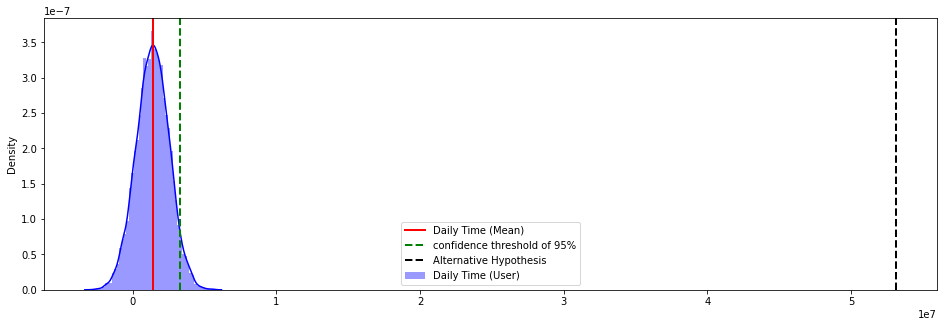

In [31]:
daily_time_pop = np.random.normal(daily_time.time.mean(), daily_time.time.std(), 10000)

ci = stats.norm.interval(0.90, daily_time.time.mean(), daily_time.time.std())

plt.figure(figsize=(16,5))
sns.distplot(daily_time_pop, label='Daily Time (User)', color='blue')
plt.axvline(daily_time.time.mean(), color='red', linewidth=2, label='Daily Time (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(daily_time_pop.mean() + t_stat*daily_time_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

Karena p-value lebih besar dari 1, maka kita bisa menolak hipotesis dan mempunyai konklusi bahwa durasi yang ditempuh pengguna Bikeshare dari tahun 2013 sampai akhir 2018 bisa meningkat.